# Анализ эффективности работы отдела продаж

## 1. Оцените эффективность отдельных владельцев сделок и рекламных кампаний с точки зрения количества обработанных сделок, коэффициента конверсии и общей суммы продаж.

In [3]:
import pandas as pd

deals_df = pd.read_pickle("deals_cleaned_v3.pkl")

In [4]:
# Обработка владельцев сделок
deals_df['is_success'] = deals_df['Stage'] == 'Payment Done'

In [12]:
owners_effect = deals_df.groupby('Deal Owner Name').agg(
    total_deals=('Id', 'count'),
    success_deals=('is_success', 'sum'),
    conversion_rate=('is_success', lambda x: round(x.sum() / x.count(), 2)),
    total_paid=('Initial Amount Paid', 'sum')
).reset_index().sort_values(by='total_paid', ascending=False)

In [13]:
owners_effect

,Deal Owner Name,total_deals,success_deals,conversion_rate,total_paid
4,Cara Iverson,1055,27,0.03,699400.0
21,Ulysses Adams,2150,141,0.07,540050.0
5,Charlie Davis,2929,148,0.05,445600.0
12,Julia Nelson,2196,93,0.04,382961.0
22,Victor Barnes,1229,44,0.04,348900.0
17,Paula Underwood,1855,93,0.05,326750.0
2,Ben Hall,1344,46,0.03,241700.0
18,Quincy Vincent,1878,65,0.03,221601.0
15,Nina Scott,1280,46,0.04,206150.0
16,Oliver Taylor,163,50,0.31,152650.0


In [16]:
campaigns_effect = deals_df.groupby('Campaign', observed=False).agg(
    total_deals=('Id', 'count'),
    success_deals=('is_success', 'sum'),
    conversion_rate=('is_success', lambda x: round(x.sum() / x.count(), 2)),
    total_paid=('Initial Amount Paid', 'sum')
).reset_index().sort_values(by='total_paid', ascending=False)
campaigns_effect

,Campaign,total_deals,success_deals,conversion_rate,total_paid
113,performancemax_digitalmarkt_ru_de,2633,112,0.04,422900.0
18,12.07.2023wide_de,1569,48,0.03,277000.0
150,youtube_shorts_de,1624,53,0.03,253300.0
2,02.07.23wide_de,974,52,0.05,195950.0
5,04.07.23recentlymoved_de,749,31,0.04,146600.0
...,...,...,...,...,...
141,webanons,1,0,0.00,0.0
147,work_wr,6,0,0.00,0.0
145,women_de,1,0,0.00,0.0
144,welt_de,2,0,0.00,0.0


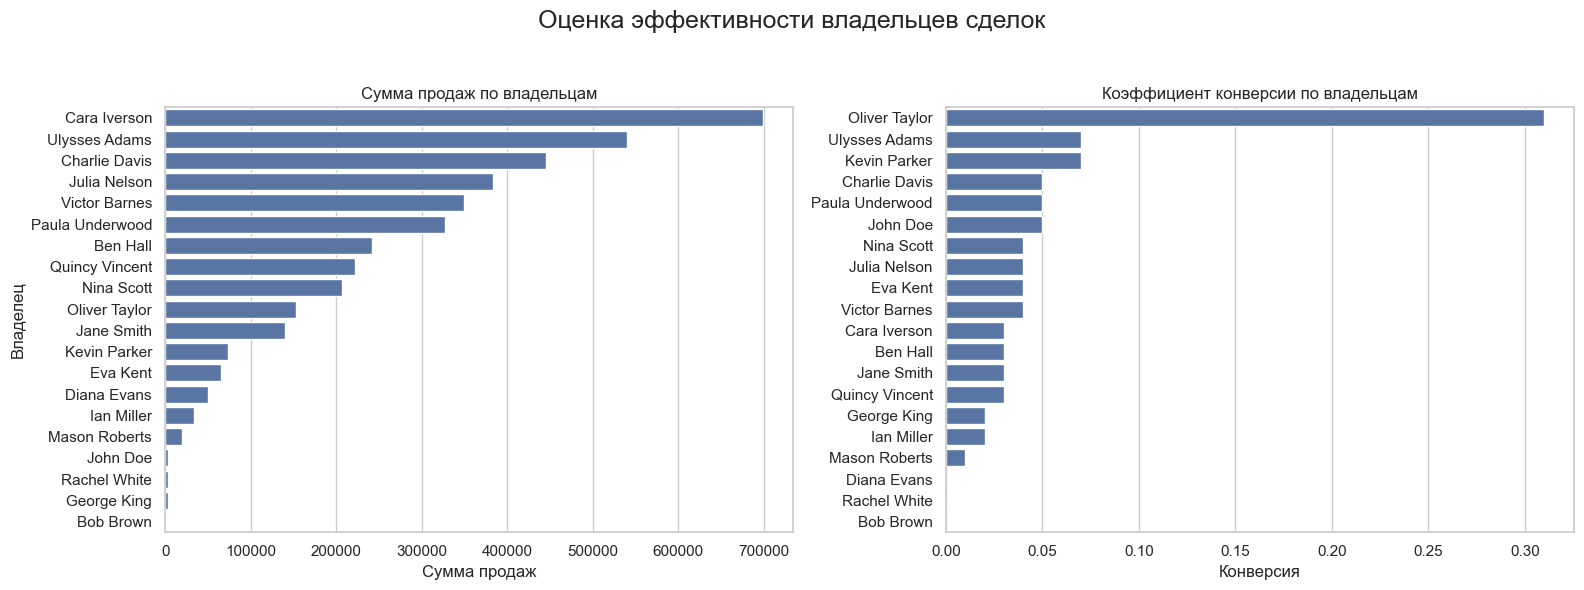

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Фильтруем владельцев сделок с нулевыми продажами
filtered_owners = owners_effect[owners_effect['total_paid'] > 0]
sorted_by_conversion = filtered_owners.sort_values('conversion_rate', ascending=False)

# Настройка визуализаций
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 строка, 2 столбца
fig.suptitle("Оценка эффективности владельцев сделок", fontsize=18)

# Сумма продаж по владельцам
sns.barplot(data=filtered_owners, x='total_paid', y='Deal Owner Name',
            ax=axes[0])
axes[0].set_title("Сумма продаж по владельцам")
axes[0].set_xlabel("Сумма продаж")
axes[0].set_ylabel("Владелец")

# Конверсия по владельцам
sns.barplot(data=sorted_by_conversion, x='conversion_rate', y='Deal Owner Name',
            ax=axes[1])
axes[1].set_title("Коэффициент конверсии по владельцам")
axes[1].set_xlabel("Конверсия")
axes[1].set_ylabel("")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [28]:
deals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21411 entries, 0 to 21410
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   Id                    21411 non-null  object         
 1   Deal Owner Name       21382 non-null  object         
 2   Closing Date          16685 non-null  datetime64[ns] 
 3   Quality               21411 non-null  category       
 4   Stage                 21411 non-null  category       
 5   Lost Reason           15942 non-null  category       
 6   Page                  20342 non-null  object         
 7   Campaign              16006 non-null  category       
 8   SLA                   15504 non-null  timedelta64[ns]
 9   Content               14101 non-null  object         
 10  Term                  12387 non-null  object         
 11  Source                21411 non-null  object         
 12  Payment Type          496 non-null    category       
 13  P

In [30]:
import pandas as pd

# Среднее время закрытия по владельцам
avg_closing_time = deals_df.groupby('Deal Owner Name', observed=False)['Create_to_Close_Days'].mean().reset_index()
avg_closing_time.columns = ['Deal Owner Name', 'Avg Closing Time (days)']

print(avg_closing_time)

    Deal Owner Name  Avg Closing Time (days)
0     Alice Johnson                 1.120000
1         Amy Green                 1.827586
2          Ben Hall                 3.283139
3         Bob Brown                 2.113150
4      Cara Iverson                 8.216107
5     Charlie Davis                18.794849
6       Diana Evans                 8.605747
7          Eva Kent                 4.779592
8       George King                17.944444
9        Ian Miller                17.873894
10       Jane Smith                17.201954
11         John Doe                21.714286
12     Julia Nelson                17.846012
13     Kevin Parker                11.038911
14    Mason Roberts                14.833333
15       Nina Scott                22.239270
16    Oliver Taylor                34.079470
17  Paula Underwood                11.318118
18   Quincy Vincent                13.711923
19     Rachel White                 2.516605
20        Sam Young                 2.649123
21    Ulys

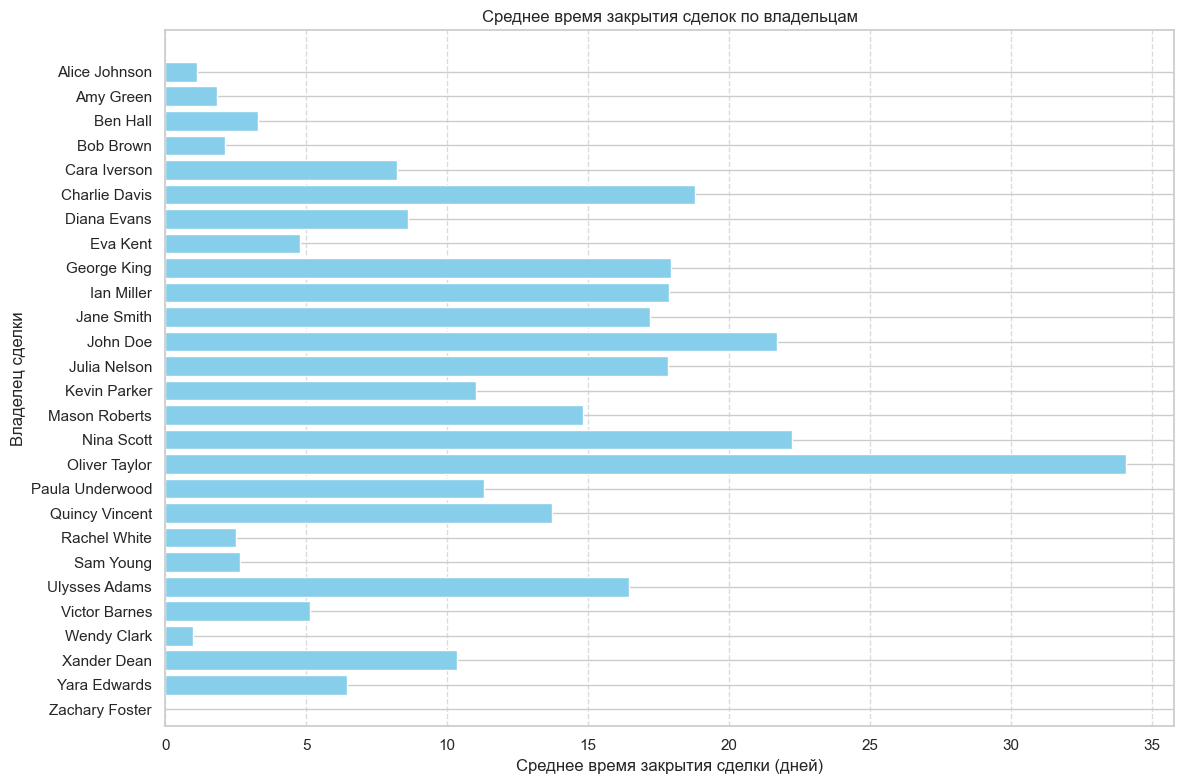

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.barh(
    avg_closing_time['Deal Owner Name'], 
    avg_closing_time['Avg Closing Time (days)'], 
    color='skyblue'
)
plt.xlabel('Среднее время закрытия сделки (дней)')
plt.ylabel('Владелец сделки')
plt.title('Среднее время закрытия сделок по владельцам')
plt.gca().invert_yaxis()  # чтобы самый быстрый сверху был
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

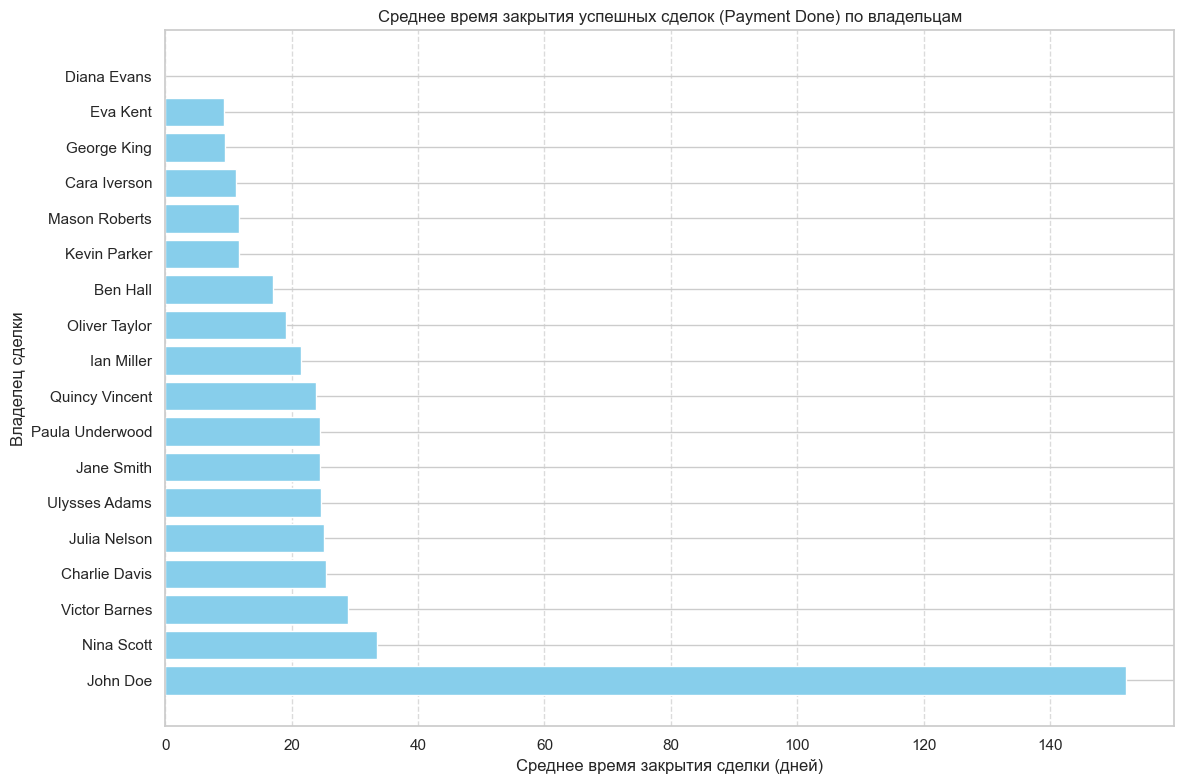

In [68]:
# Фильтруем сделки со статусом "Payment Done"
deals_success = deals_df[deals_df['is_success']]

# Среднее время закрытия по владельцам для успешных сделок
avg_closing_time_success = deals_success.groupby('Deal Owner Name', observed=False)['Create_to_Close_Days'].mean().reset_index()
avg_closing_time_success.columns = ['Deal Owner Name', 'Avg Closing Time (days)']

# Сортируем по времени для красивого графика
avg_closing_time_success = avg_closing_time_success.sort_values('Avg Closing Time (days)')

plt.figure(figsize=(12, 8))
plt.barh(
    avg_closing_time_success['Deal Owner Name'], 
    avg_closing_time_success['Avg Closing Time (days)'], 
    color='skyblue'
)
plt.xlabel('Среднее время закрытия сделки (дней)')
plt.ylabel('Владелец сделки')
plt.title('Среднее время закрытия успешных сделок (Payment Done) по владельцам')
plt.gca().invert_yaxis()  # чтобы самый быстрый был сверху
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

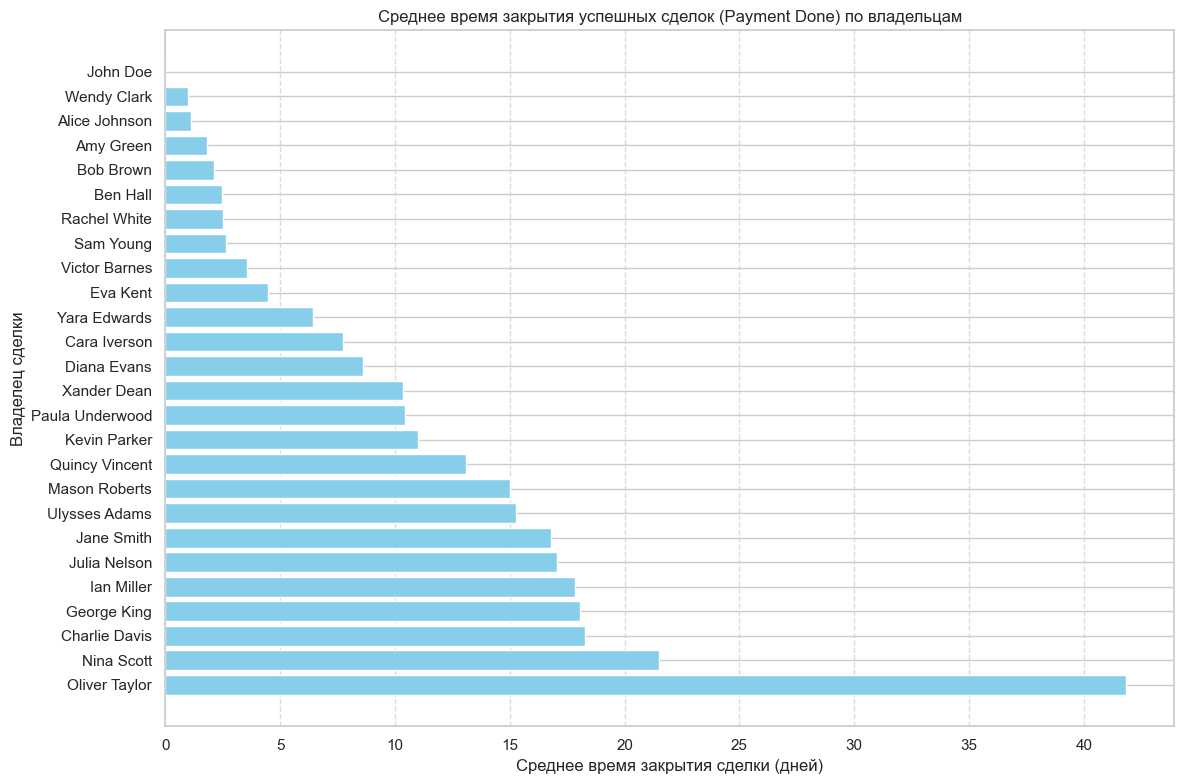

In [69]:
# Фильтруем сделки со статусом "Payment Done"
lost_deals_df = deals_df[deals_df['Stage'] == 'Lost']

# Среднее время закрытия по владельцам для успешных сделок
avg_closing_time_lost = lost_deals_df.groupby('Deal Owner Name', observed=False)['Create_to_Close_Days'].mean().reset_index()
avg_closing_time_lost.columns = ['Deal Owner Name', 'Avg Closing Time (days)']

# Сортируем по времени для красивого графика
avg_closing_time_lost = avg_closing_time_lost.sort_values('Avg Closing Time (days)')

plt.figure(figsize=(12, 8))
plt.barh(
    avg_closing_time_lost['Deal Owner Name'], 
    avg_closing_time_lost['Avg Closing Time (days)'], 
    color='skyblue'
)
plt.xlabel('Среднее время закрытия сделки (дней)')
plt.ylabel('Владелец сделки')
plt.title('Среднее время закрытия успешных сделок (Payment Done) по владельцам')
plt.gca().invert_yaxis()  # чтобы самый быстрый был сверху
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [35]:
# Фильтруем только потерянные сделки (например, по стадии или наличию Lost Reason)
lost_deals_df = deals_df[deals_df['Stage'] == 'Lost']

# Считаем количество каждой причины потери по владельцам
lost_reason_counts = lost_deals_df.groupby(['Deal Owner Name', 'Lost Reason']).size().reset_index(name='Count')

# Для удобства можно посмотреть в табличном виде (pivot)
pivot_lost_reason = lost_reason_counts.pivot(index='Deal Owner Name', columns='Lost Reason', values='Count').fillna(0)

print(pivot_lost_reason)

Lost Reason      Changed Decision  Conditions are not suitable  \
Deal Owner Name                                                  
Alice Johnson                   0                           10   
Amy Green                       0                            0   
Ben Hall                      147                           34   
Bob Brown                       1                            8   
Cara Iverson                   82                           12   
Charlie Davis                 337                           54   
Diana Evans                   137                           29   
Eva Kent                       20                           12   
George King                     6                            6   
Ian Miller                     42                            4   
Jane Smith                     75                           29   
John Doe                        0                            0   
Julia Nelson                  227                          107   
Kevin Park

C:\Users\user\AppData\Local\Temp\ipykernel_14244\1639811859.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lost_reason_counts = lost_deals_df.groupby(['Deal Owner Name', 'Lost Reason']).size().reset_index(name='Count')


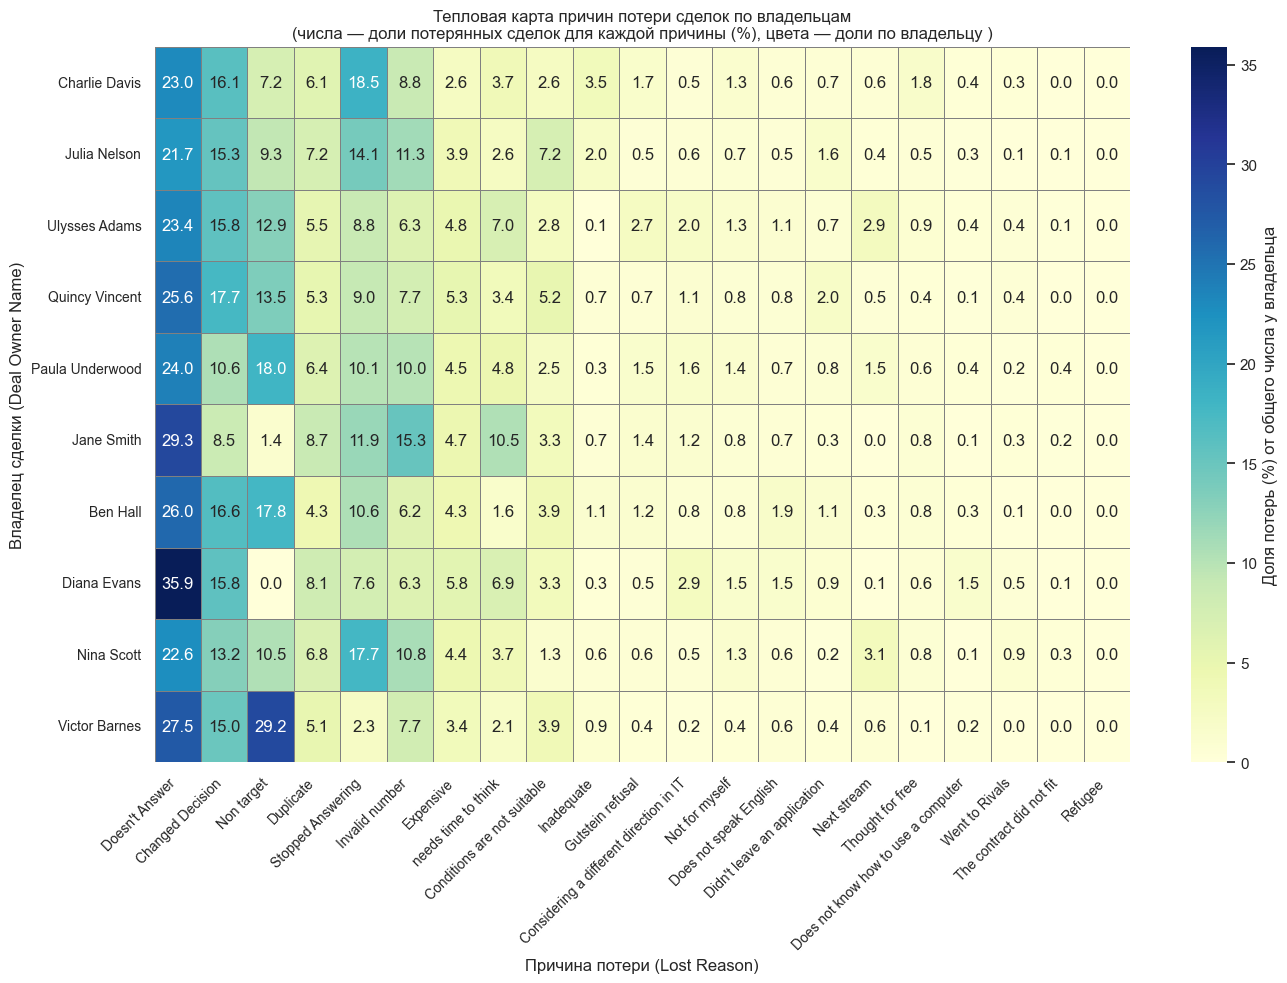

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Сортируем владельцев и причины потерь по суммарному количеству (по всей таблице)
sorted_owners = pivot_lost_reason.sum(axis=1).sort_values(ascending=False).index
sorted_reasons = pivot_lost_reason.sum(axis=0).sort_values(ascending=False).index

# Отсортированная таблица
pivot_sorted = pivot_lost_reason.loc[sorted_owners, sorted_reasons]

# Берём топ-5 владельцев
pivot_top10 = pivot_sorted.head(10)

# Нормализуем по строкам для долей
pivot_norm = pivot_top10.div(pivot_top10.sum(axis=1), axis=0).fillna(0)
pivot_norm_percent = pivot_norm * 100

plt.figure(figsize=(14, 10))
sns.heatmap(
    pivot_norm_percent,
    annot=pivot_norm_percent.round(1),
    fmt='.1f',
    cmap='YlGnBu',
    cbar_kws={'label': 'Доля потерь (%) от общего числа у владельца'},
    linewidths=0.5,
    linecolor='gray',
)

plt.title('Тепловая карта причин потери сделок по владельцам\n(числа — доли потерянных сделок для каждой причины (%), цвета — доли по владельцу )')
plt.xlabel('Причина потери (Lost Reason)')
plt.ylabel('Владелец сделки (Deal Owner Name)')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [60]:
print(pivot_norm_percent.sum(axis=1))

Deal Owner Name
Charlie Davis      100.0
Julia Nelson       100.0
Ulysses Adams      100.0
Quincy Vincent     100.0
Paula Underwood    100.0
Jane Smith         100.0
Ben Hall           100.0
Diana Evans        100.0
Nina Scott         100.0
Victor Barnes      100.0
dtype: float64


In [54]:
pivot_top10.head()

Lost Reason,Doesn't Answer,Changed Decision,Non target,Duplicate,Stopped Answering,Invalid number,Expensive,needs time to think,Conditions are not suitable,Inadequate,...,Considering a different direction in IT,Not for myself,Does not speak English,Didn't leave an application,Next stream,Thought for free,Does not know how to use a computer,Went to Rivals,The contract did not fit,Refugee
Deal Owner Name,,,,,,,,,,,,,,,,,,,,,
Charlie Davis,481,337,151,128,386,183,54,77,54,73,...,11,27,12,14,12,38,8,6,0,0
Julia Nelson,321,227,138,106,208,167,58,39,107,30,...,9,11,8,23,6,7,4,2,1,0
Ulysses Adams,326,220,180,76,122,88,67,98,39,1,...,28,18,15,10,41,12,5,6,2,0
Quincy Vincent,351,242,185,72,124,105,72,47,71,9,...,15,11,11,27,7,5,2,6,0,0
Paula Underwood,312,138,235,83,131,130,58,62,32,4,...,21,18,9,10,20,8,5,2,5,0


In [57]:
print(pivot_norm_percent.head())
print(pivot_top10.head())

Lost Reason      Doesn't Answer  Changed Decision  Non target  Duplicate  \
Deal Owner Name                                                            
Charlie Davis         23.047437         16.147580    7.235266   6.133206   
Julia Nelson          21.703854         15.348208    9.330629   7.167005   
Ulysses Adams         23.436377         15.815960   12.940331   5.463695   
Quincy Vincent        25.601751         17.651349   13.493800   5.251641   
Paula Underwood       23.963134         10.599078   18.049155   6.374808   

Lost Reason      Stopped Answering  Invalid number  Expensive  \
Deal Owner Name                                                 
Charlie Davis            18.495448        8.768567   2.587446   
Julia Nelson             14.063556       11.291413   3.921569   
Ulysses Adams             8.770669        6.326384   4.816679   
Quincy Vincent            9.044493        7.658643   5.251641   
Paula Underwood          10.061444        9.984639   4.454685   

Lost Reason

In [55]:
pivot_top10.sum(axis=1)

Deal Owner Name
Charlie Davis      2087
Julia Nelson       1479
Ulysses Adams      1391
Quincy Vincent     1371
Paula Underwood    1302
Jane Smith          885
Ben Hall            883
Diana Evans         869
Nina Scott          859
Victor Barnes       816
dtype: int64

In [36]:
# Считаем количество сделок каждого качества по владельцам
quality_counts = deals_df.groupby(['Deal Owner Name', 'Quality']).size().reset_index(name='Count')

# Также можно сделать сводную таблицу для удобства
pivot_quality = quality_counts.pivot(index='Deal Owner Name', columns='Quality', values='Count').fillna(0)

print(pivot_quality)

Quality          A - High  B - Medium  C - Low  D - Non Target  \
Deal Owner Name                                                  
Alice Johnson           0           0        0              25   
Amy Green              24           9        2               9   
Ben Hall              130         173      133             496   
Bob Brown               0           0        1              25   
Cara Iverson          108          37      142             408   
Charlie Davis         259         274      605             985   
Diana Evans            22          53      313             222   
Eva Kent               18         131       46             147   
George King             1           4       27              22   
Ian Miller             31          26       61              23   
Jane Smith             24          97      275             108   
John Doe                7           0        7               1   
Julia Nelson          194         189      591             511   
Kevin Park

C:\Users\user\AppData\Local\Temp\ipykernel_14244\1376771541.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quality_counts = deals_df.groupby(['Deal Owner Name', 'Quality']).size().reset_index(name='Count')


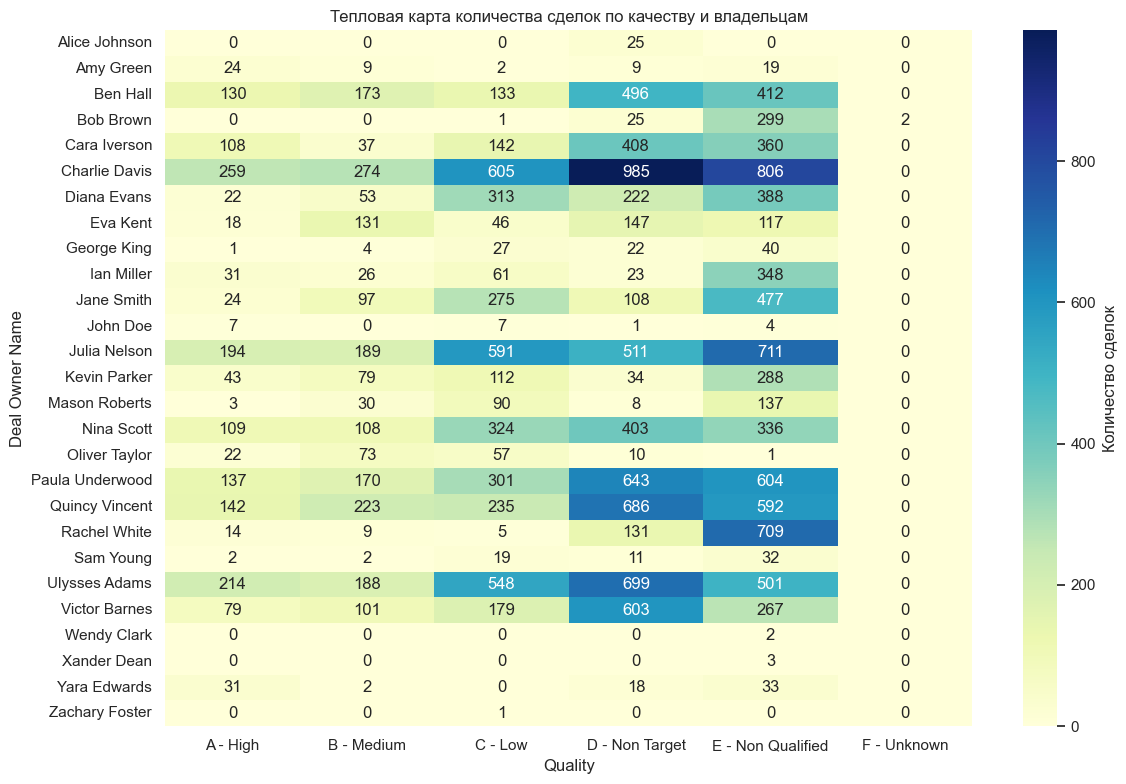

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_quality, annot=True, fmt='.0f', cmap='YlGnBu', cbar_kws={'label': 'Количество сделок'})

plt.title('Тепловая карта количества сделок по качеству и владельцам')
plt.xlabel('Quality')
plt.ylabel('Deal Owner Name')
plt.tight_layout()
plt.show()